<a href="https://colab.research.google.com/github/ontAnalog/UTS-PROJECT-1-BIG-DATA-PROBLEM/blob/main/SVM_iot_data_sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.preprocessing import StandardScaler

In [2]:
# Memasukkan dataframe
heat = pd.read_csv('/content/Heat_index.csv')
heat = heat.rename(columns={"_value": heat['_field'][0]})
heat = heat.drop(['Unnamed: 0', 'result','table','_start','_stop','_measurement','_field'], axis=1)
heat

,_time,Heat_index
0,2022-04-13T21:38:00Z,26.389790
1,2022-04-13T21:39:00Z,26.391128
2,2022-04-13T21:40:00Z,26.377855
3,2022-04-13T21:41:00Z,26.401618
4,2022-04-13T21:42:00Z,26.414282
...,...,...
39961,2022-05-12T11:05:00Z,25.750230
39962,2022-05-12T11:06:00Z,25.769433
39963,2022-05-12T11:07:00Z,25.749795
39964,2022-05-12T11:08:00Z,25.753275


In [3]:
# Memasukkan dataframe
humi = pd.read_csv('/content/Humidity.csv')
humi = humi.rename(columns={"_value": humi['_field'][0]})
humi = humi.drop(['Unnamed: 0', 'result','table','_start','_stop','_measurement','_field'], axis=1)
humi

,_time,Humidity
0,2022-04-13T21:38:00Z,32.400000
1,2022-04-13T21:39:00Z,32.433333
2,2022-04-13T21:40:00Z,32.100000
3,2022-04-13T21:41:00Z,31.916667
4,2022-04-13T21:42:00Z,31.716667
...,...,...
40962,2022-05-13T03:46:00Z,36.800000
40963,2022-05-13T03:47:00Z,36.800000
40964,2022-05-13T03:48:00Z,36.733333
40965,2022-05-13T03:49:00Z,36.700000


In [4]:
# Memasukkan dataframe
temp = pd.read_csv('/content/Temperature.csv')
temp = temp.rename(columns={"_value": temp['_field'][0]})
temp = temp.drop(['Unnamed: 0', 'result','table','_start','_stop','_measurement','_field'], axis=1)
temp

,_time,Temperature
0,2022-04-13T21:38:00Z,26.800000
1,2022-04-13T21:39:00Z,26.800000
2,2022-04-13T21:40:00Z,26.800000
3,2022-04-13T21:41:00Z,26.850000
4,2022-04-13T21:42:00Z,26.883333
...,...,...
40715,2022-05-12T23:39:00Z,26.700000
40716,2022-05-12T23:40:00Z,26.700000
40717,2022-05-12T23:41:00Z,26.700000
40718,2022-05-12T23:42:00Z,26.683333


In [5]:
# Membuat dataframe baru dari tiga dataframe
df = pd.concat([heat, humi.drop(['_time'], axis=1)], axis=1)
df = pd.concat([df, temp.drop(['_time'], axis=1)], axis=1)
df

,_time,Heat_index,Humidity,Temperature
0,2022-04-13T21:38:00Z,26.389790,32.400000,26.800000
1,2022-04-13T21:39:00Z,26.391128,32.433333,26.800000
2,2022-04-13T21:40:00Z,26.377855,32.100000,26.800000
3,2022-04-13T21:41:00Z,26.401618,31.916667,26.850000
4,2022-04-13T21:42:00Z,26.414282,31.716667,26.883333
...,...,...,...,...
40962,NaN,NaN,36.800000,NaN
40963,NaN,NaN,36.800000,NaN
40964,NaN,NaN,36.733333,NaN
40965,NaN,NaN,36.700000,NaN


In [31]:
# memberikan ringkasan statistik deskriptif dari dataframe
df.describe()

,Heat_index,Humidity,Temperature
count,39965.000000,40966.000000,40719.000000
mean,26.068548,40.315111,26.361632
std,1.224987,8.643637,1.287189
min,22.904815,20.200000,23.050000
25%,25.227272,34.400000,25.500000
50%,26.483030,39.700000,26.550000
75%,26.995002,44.600000,27.283333
max,29.869558,89.300000,29.600000


In [7]:
# Mencari nilai hilang pada setiap dataframe
df.isnull().sum()/len(df)

_time          0.024459
Heat_index     0.024459
Humidity       0.000024
Temperature    0.006054
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40967 entries, 0 to 40966
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _time        39965 non-null  object 
 1   Heat_index   39965 non-null  float64
 2   Humidity     40966 non-null  float64
 3   Temperature  40719 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [9]:
# Menghilangkan kolom _time
df.drop(columns=['_time'], inplace=True)

In [10]:
# menampilkan informasi tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40967 entries, 0 to 40966
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Heat_index   39965 non-null  float64
 1   Humidity     40966 non-null  float64
 2   Temperature  40719 non-null  float64
dtypes: float64(3)
memory usage: 960.3 KB


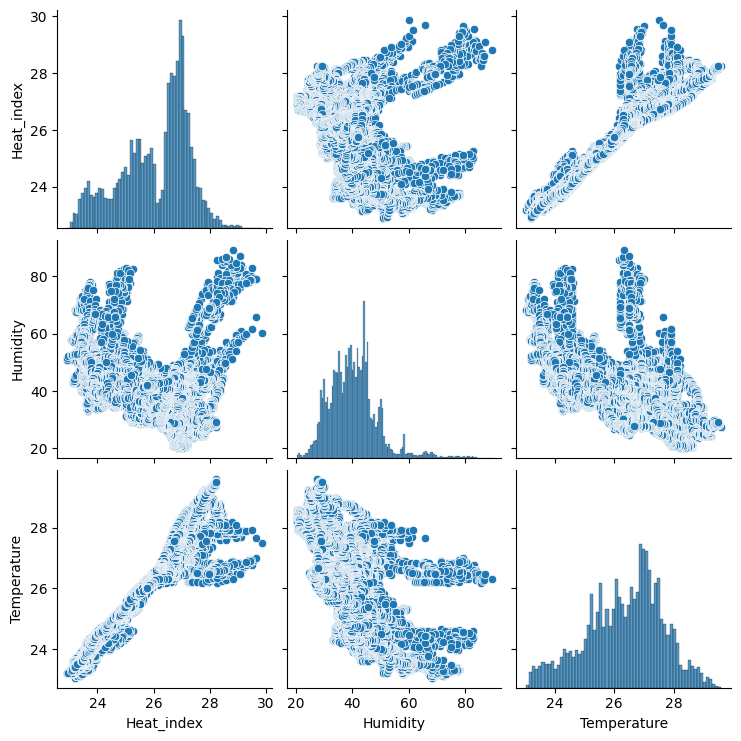

In [11]:
# Membuat pairplot yang menampilkan hubungan antara setiap pasangan variabel dalam dataframe
sns.pairplot(df)

Text(0, 0.5, 'Temperature')

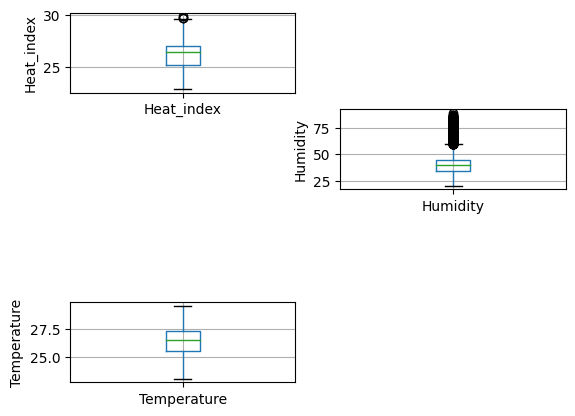

In [12]:
# Menampilkan distribusi dari kolom 'Heat_index', 'Humidity', dan 'Temperature' dalam dataframe menggunaan plot boxplot
plt.subplot(4, 2, 1)
fig = df.boxplot(column='Heat_index')
fig.set_title('')
fig.set_ylabel('Heat_index')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='Humidity')
fig.set_title('')
fig.set_ylabel('Humidity')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='Temperature')
fig.set_title('')
fig.set_ylabel('Temperature')

Text(0, 0.5, 'appears as much')

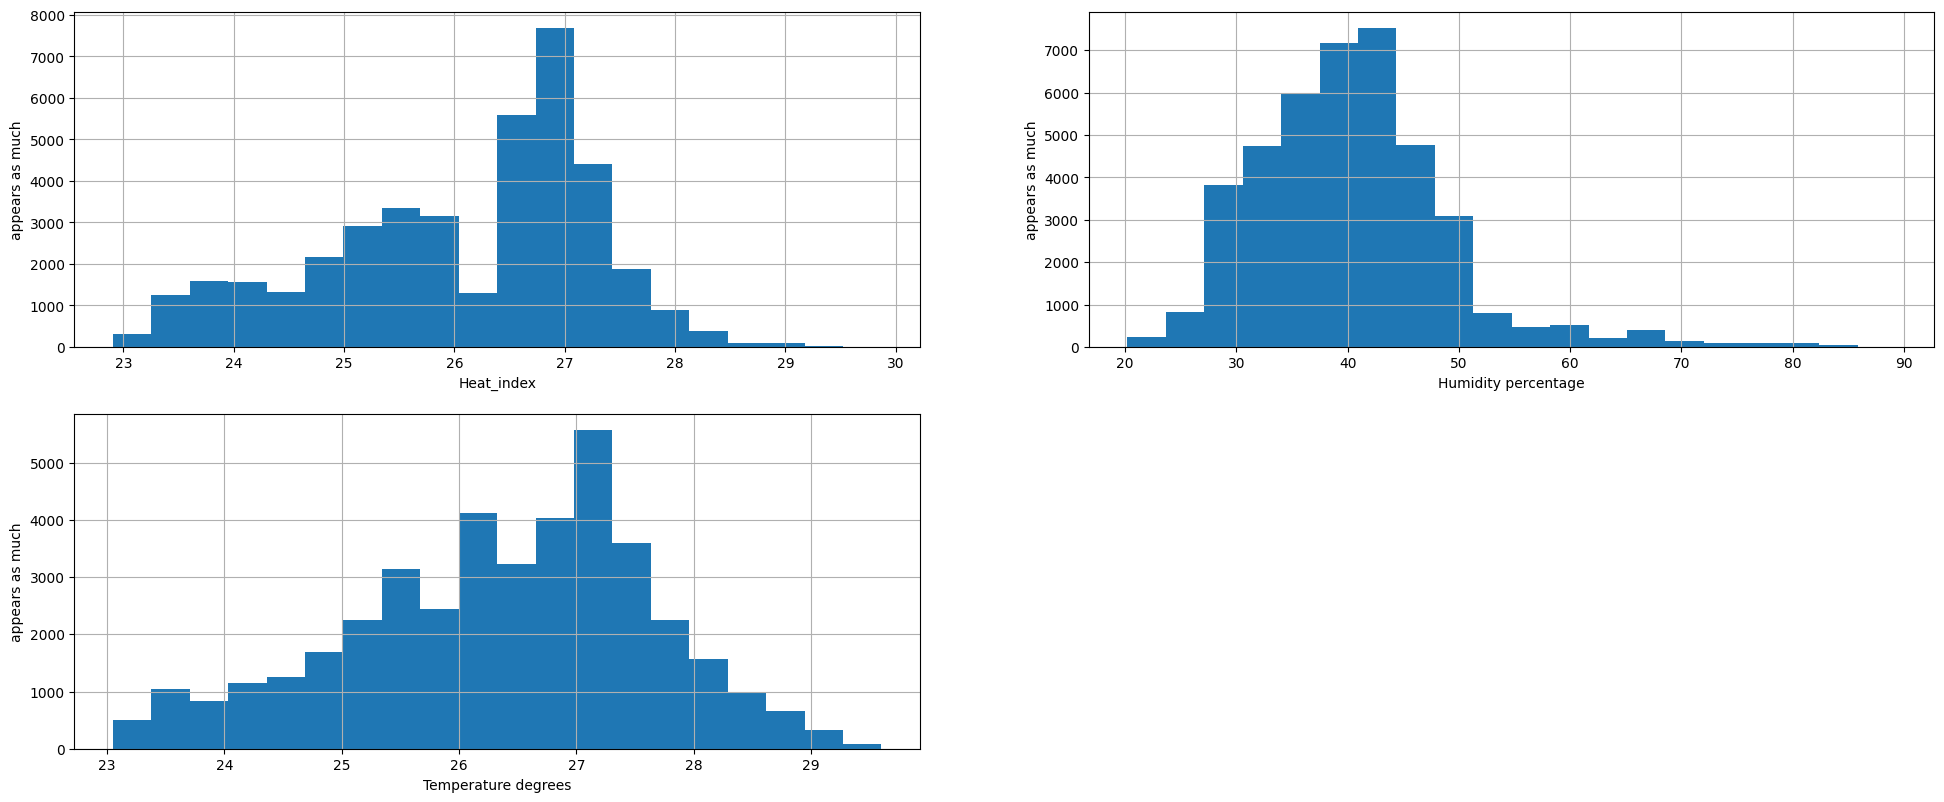

In [13]:
# Membuat tiga histogram secara berurutan dalam satu gambar
# Menampilkan distribusi dari kolom 'Heat_index', 'Humidity', dan 'Temperature' dalam dataframe
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Heat_index'].hist(bins=20)
fig.set_xlabel('Heat_index')
fig.set_ylabel('appears as much')


plt.subplot(4, 2, 2)
fig = df['Humidity'].hist(bins=20)
fig.set_xlabel('Humidity percentage')
fig.set_ylabel('appears as much')


plt.subplot(4, 2, 3)
fig = df['Temperature'].hist(bins=20)
fig.set_xlabel('Temperature degrees')
fig.set_ylabel('appears as much')

# **Deklarasikan vektor fitur dan variabel target**

In [14]:
X = df.drop(['Heat_index'], axis=1)

y = df['Heat_index']

# **Pisahkan data menjadi training set dan test set terpisah**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_train.shape, X_test.shape

((32773, 2), (8194, 2))

# **Feature Scaling**

In [17]:
cols = X_train.columns

In [18]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [20]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [21]:
X_train.describe()

,Humidity,Temperature
count,3.277200e+04,3.257200e+04
mean,3.407706e-16,-8.098643e-18
std,1.000015e+00,1.000015e+00
min,-2.316270e+00,-2.575741e+00
25%,-6.851258e-01,-6.702495e-01
50%,-7.224588e-02,1.334271e-01
75%,4.964452e-01,7.167407e-01
max,5.645405e+00,2.518532e+00


In [22]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load dataset (contoh menggunakan Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

In [23]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Membuat model SVC dan melatihnya
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [25]:
# Memprediksi kelas untuk data uji
y_pred = svc.predict(X_test)

# Run SVM with default hyperparameters

In [26]:
from sklearn.metrics import accuracy_score

svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


In [27]:
svc = SVC(C=100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy score with rbf kernel and C=100.0: {0:0.4f}'.format(accuracy))

Model accuracy score with rbf kernel and C=100.0: 0.9667


In [28]:
# Menampilkan clasification result
def display_classification_results(y_true, y_pred):
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    loss = log_loss(y_true, y_pred)
    print("Log Loss:", loss)

    classification_result = "Model is Good" if loss < 0.5 else "Model is Bad"
    print("Classification Result:", classification_result)


y_true = [1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [1, 1, 1, 1, 0, 0, 1, 0]

display_classification_results(y_true, y_pred)



Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

Confusion Matrix:
[[2 2]
 [1 3]]
Accuracy: 0.625
Log Loss: 13.516370020918933
Classification Result: Model is Bad


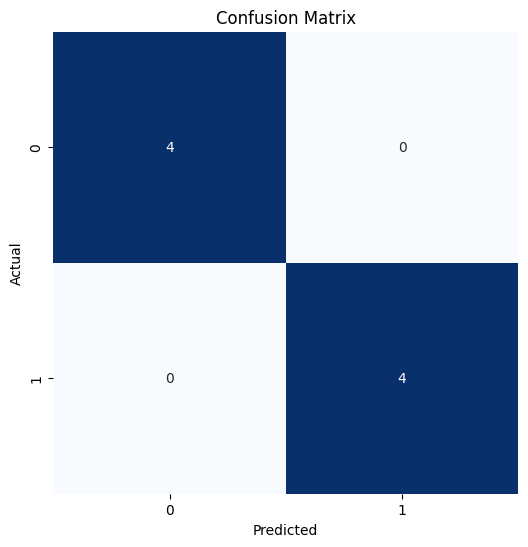

In [29]:
# Menampilkan confusion matrix
y_pred = [0.2, 0.6, 0.8, 0.3, 0.7, 0.9, 0.1, 0.4]


y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]


y_test = [0, 1, 1, 0, 1, 1, 0, 0]


cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()